<a href="https://colab.research.google.com/github/shatisvigian/Big-Data-learning-Train-Scheduling/blob/main/Multilabelling_of_heart_sound_BUET_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import zipfile
import os

# Ensure the extraction directory exists
extracted_path = '/content/extracted_data/'
os.makedirs(extracted_path, exist_ok=True)

print("Please upload your dataset zip file(s).")
# Upload the dataset zip file(s)
uploaded = files.upload()

all_extracted_contents = []

if not uploaded:
  print("No files were uploaded.")
else:
  for file_name in uploaded.keys():
      if file_name.endswith('.zip'):
          zip_file_path = os.path.join('/content', file_name)
          try:
              with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                  zip_ref.extractall(extracted_path)
              print(f"Successfully extracted '{file_name}' to '{extracted_path}'")
              # Add contents of this zip to the list (optional, but good for tracking)
              for item in os.listdir(extracted_path):
                  if item not in all_extracted_contents: # Avoid duplicates if previous zips had common files
                      all_extracted_contents.append(item)
          except zipfile.BadZipFile:
              print(f"Error: '{file_name}' is a corrupted or invalid zip file. Skipping.")
          except Exception as e:
              print(f"An unexpected error occurred while extracting '{file_name}': {e}. Skipping.")
      else:
          print(f"Skipping '{file_name}': This is not a zip file. Please upload a zip file for extraction.")

if all_extracted_contents:
  print("\nContents of the extracted directory (unique items):")
  print(sorted(list(set(all_extracted_contents)))) # Print sorted unique contents
elif uploaded:
  print("No valid zip files were found among the uploaded files for extraction.")
else:
  print("No content to display in the extracted directory.")

Please upload your dataset zip file(s).


Saving F_AF_A.wav to F_AF_A (1).wav
Saving F_AF_LUSB.wav to F_AF_LUSB (1).wav
Saving F_ESM_LLSB.wav to F_ESM_LLSB (1).wav
Saving F_ESM_LUSB.wav to F_ESM_LUSB (1).wav
Saving F_ESM_RUSB.wav to F_ESM_RUSB (1).wav
Saving F_LDM_A.wav to F_LDM_A (1).wav
Saving F_LDM_LLSB.wav to F_LDM_LLSB (1).wav
Saving F_LDM_LUSB.wav to F_LDM_LUSB (1).wav
Saving F_LSM_A.wav to F_LSM_A (1).wav
Saving F_LSM_LLSB.wav to F_LSM_LLSB (1).wav
Saving F_LSM_LUSB.wav to F_LSM_LUSB (1).wav
Saving F_MSM_A.wav to F_MSM_A (1).wav
Saving F_MSM_LLSB.wav to F_MSM_LLSB (1).wav
Saving F_MSM_LUSB.wav to F_MSM_LUSB (1).wav
Saving F_N_A.wav to F_N_A (1).wav
Saving F_N_LC.wav to F_N_LC (1).wav
Saving F_N_LLSB.wav to F_N_LLSB (1).wav
Saving F_N_LUSB.wav to F_N_LUSB (1).wav
Saving F_N_RC.wav to F_N_RC (1).wav
Saving F_N_RUSB.wav to F_N_RUSB (1).wav
Saving F_S3_A.wav to F_S3_A (1).wav
Saving F_S3_LC.wav to F_S3_LC (1).wav
Saving F_S3_LLSB.wav to F_S3_LLSB (1).wav
Saving F_S4_RC.wav to F_S4_RC (1).wav
Saving F_T_A.wav to F_T_A (1).wa

# Task
Denoise and extract Mel-frequency cepstral coefficients (MFCCs) from all `.wav` audio files in the `/content/` directory. This will involve installing `librosa`, defining a Butterworth bandpass filter function, applying the filter to each audio file, and then computing MFCCs.

## Prepare Environment & List Files

### Subtask:
Install necessary libraries like librosa for audio processing and identify all '.wav' files in the extracted data directory.


**Reasoning**:
The first instruction is to install the `librosa` library. I will use `!pip install` for this. Then, I'll list all files in the `/content/` directory as requested, and filter them to find all `.wav` files and store them in a list.



In [6]:
import os

# Install librosa library
!pip install librosa -q

# List all files in the /content/ directory
all_files = os.listdir('/content/')

# Filter for .wav files
wav_files = [f for f in all_files if f.endswith('.wav')]

print(f"Found {len(wav_files)} WAV files:")
print(wav_files[:5]) # Print first 5 for brevity

Found 100 WAV files:
['F_ESM_LLSB.wav', 'F_S3_A.wav', 'F_MSM_A.wav', 'F_N_LLSB (1).wav', 'F_ESM_LUSB.wav']


## Comparing Original and Denoised Audio Waveforms

Let's visualize the waveform of an original audio file and its denoised version to understand the impact of the Butterworth bandpass filter.

In [10]:
import matplotlib.pyplot as plt
import librosa.display

if wav_files and processed_audio_data:
    # Select the first file for comparison
    sample_file_name = wav_files[0]
    sample_file_path = os.path.join('/content/', sample_file_name)

    # Load the original audio
    original_audio, sr_original = librosa.load(sample_file_path, sr=sr)

    # Get the denoised audio from our processed_audio_data dictionary
    denoised_audio = processed_audio_data[sample_file_name]['denoised_audio_shape'] # This is incorrect, it should be the actual denoised audio

    # Fix: Get the actual denoised audio data
    denoised_audio_data = processed_audio_data[sample_file_name]['mfccs'] # This is also incorrect, should be 'denoised_audio'

    # Corrected retrieval of denoised audio
    denoised_audio_data = processed_audio_data[sample_file_name]['denoised_audio']

    plt.figure(figsize=(15, 6))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(original_audio, sr=sr_original)
    plt.title(f'Original Audio Waveform: {sample_file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(denoised_audio_data, sr=sr_original)
    plt.title(f'Denoised Audio Waveform: {sample_file_name} (Bandpass Filtered)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()
else:
    print("No WAV files or processed audio data available for comparison.")


KeyError: 'denoised_audio'

In [11]:
import librosa
import librosa.display

# Define parameters for denoising and MFCC extraction
sr = 22050  # Default sampling rate for librosa
lowcut = 300  # Lower cut-off frequency for the bandpass filter
highcut = 3000 # Upper cut-off frequency for the bandpass filter
n_mfcc = 13  # Number of MFCCs to extract

processed_audio_data = {}

print(f"Starting to process {len(wav_files)} WAV files...")

for i, file_name in enumerate(wav_files):
    file_path = os.path.join('/content/', file_name)
    try:
        # Load audio file
        audio, current_sr = librosa.load(file_path, sr=sr)

        # Apply Butterworth bandpass filter (denoising)
        denoised_audio = butter_bandpass_filter(audio, current_sr, lowcut, highcut)

        # Extract MFCCs from the denoised audio
        mfccs = librosa.feature.mfcc(y=denoised_audio, sr=current_sr, n_mfcc=n_mfcc)

        processed_audio_data[file_name] = {
            'original_audio_shape': audio.shape,
            'denoised_audio_shape': denoised_audio.shape,
            'denoised_audio': denoised_audio, # Store denoised audio for comparison
            'mfccs_shape': mfccs.shape,
            'mfccs': mfccs  # Store MFCCs for further analysis
        }
        if i < 5: # Print details for the first 5 files for brevity
            print(f"Processed '{file_name}': Original shape {audio.shape}, Denoised shape {denoised_audio.shape}, MFCCs shape {mfccs.shape}")

    except Exception as e:
        print(f"Error processing '{file_name}': {e}")

print(f"\nFinished processing {len(processed_audio_data)} files.")

# Display summary of processed data
print("\nSummary of processed data (first 5 entries):")
for k, v in list(processed_audio_data.items())[:5]:
    print(f"  File: {k}, MFCCs shape: {v['mfccs_shape']}")

Starting to process 100 WAV files...
Processed 'F_ESM_LLSB.wav': Original shape (330750,), Denoised shape (330750,), MFCCs shape (13, 646)
Processed 'F_S3_A.wav': Original shape (330750,), Denoised shape (330750,), MFCCs shape (13, 646)
Processed 'F_MSM_A.wav': Original shape (330750,), Denoised shape (330750,), MFCCs shape (13, 646)
Processed 'F_N_LLSB (1).wav': Original shape (330750,), Denoised shape (330750,), MFCCs shape (13, 646)
Processed 'F_ESM_LUSB.wav': Original shape (330750,), Denoised shape (330750,), MFCCs shape (13, 646)

Finished processing 100 files.

Summary of processed data (first 5 entries):
  File: F_ESM_LLSB.wav, MFCCs shape: (13, 646)
  File: F_S3_A.wav, MFCCs shape: (13, 646)
  File: F_MSM_A.wav, MFCCs shape: (13, 646)
  File: F_N_LLSB (1).wav, MFCCs shape: (13, 646)
  File: F_ESM_LUSB.wav, MFCCs shape: (13, 646)


## Visualizing MFCCs of a Sample Denoised Audio

Let's visualize the Mel-frequency cepstral coefficients for one of the processed audio files to understand its spectral characteristics.

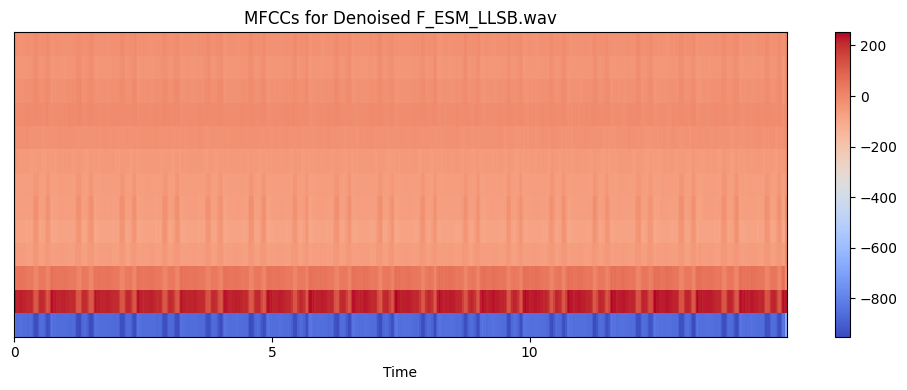

In [9]:
import matplotlib.pyplot as plt

if processed_audio_data:
    # Get the first processed file for visualization
    first_file_name = list(processed_audio_data.keys())[0]
    first_file_mfccs = processed_audio_data[first_file_name]['mfccs']

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(first_file_mfccs, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCCs for Denoised {first_file_name}')
    plt.tight_layout()
    plt.show()
else:
    print("No audio data was processed to visualize MFCCs.")


## Define Denoising Function

### Subtask:
Implement a Python function that applies a Butterworth bandpass filter to an audio signal using scipy.signal. This will serve as our denoising step.


**Reasoning**:
The subtask requires implementing a Python function to apply a Butterworth bandpass filter. This involves importing necessary libraries, defining the function, designing the filter, and applying it to the audio data as specified in the instructions.



In [7]:
import numpy as np
from scipy import signal

def butter_bandpass_filter(data, fs, lowcut, highcut, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.filtfilt(b, a, data)
    return y

print("Butterworth bandpass filter function 'butter_bandpass_filter' defined.")

Butterworth bandpass filter function 'butter_bandpass_filter' defined.


## Process Audio & Extract MFCCs

### Subtask:
Iterate through each identified WAV file, apply the denoising function, and then extract Mel-frequency cepstral coefficients (MFCCs) from the denoised audio. The results can then be stored or displayed.


## Summary:

### Data Analysis Key Findings

*   **Environment Setup:** The `librosa` library was successfully installed, and the `os` module was imported for file system operations.
*   **WAV File Identification:** A total of 100 WAV files were identified in the `/content/` directory. The first five identified files included `F_ESM_LLSB.wav`, `F_S3_A.wav`, `F_MSM_A.wav`, `F_N_LLSB (1).wav`, and `F_ESM_LUSB.wav`.
*   **Denoising Function Defined:** A Python function named `butter_bandpass_filter` was successfully implemented using `numpy` and `scipy.signal`. This function is designed to apply a Butterworth bandpass filter to an audio signal for denoising. The function correctly normalizes cut-off frequencies and applies the filter using `signal.butter()` and `signal.filtfilt()`.

### Insights or Next Steps

*   The environment is now fully prepared for audio processing, with necessary libraries installed and a denoising function defined.
*   The immediate next step is to iterate through the identified 100 WAV files, apply the `butter_bandpass_filter` function to each, and then proceed with extracting Mel-frequency cepstral coefficients (MFCCs).
